In [1]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

df = pd.read_csv('data/traffic.csv')
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [2]:
df.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
45644,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [4]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [5]:
df.shape

(45645, 9)

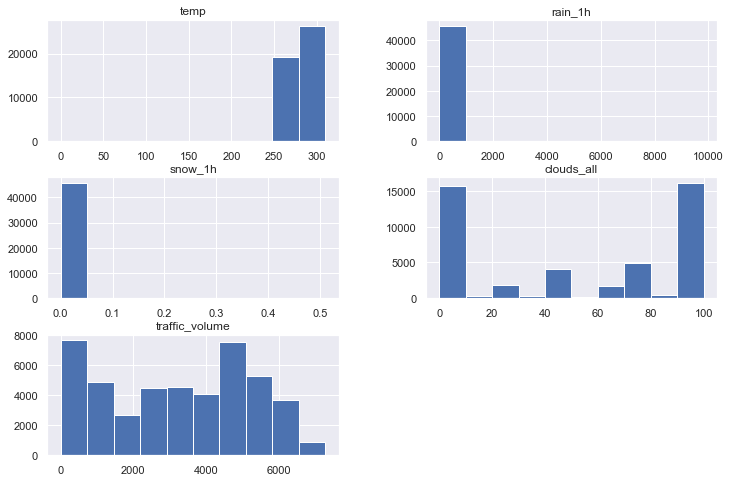

In [6]:
df.hist(figsize=(12,8))
plt.show()

Here we can visualize the numerical variables' distribution.
Temp values are largely between 250 to 300.
rain_1h and snow_1h values are largely situated in the small decimals.
clouds_all has more values on both ends of 0 and 100
traffic_volume values on the other hand is well distributed across its min and max.

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009013,-0.020789,-0.098133,0.129333
rain_1h,0.009013,1.000000,-0.000101,0.005121,0.004833
snow_1h,-0.020789,-0.000101,1.000000,0.029308,0.000713
clouds_all,-0.098133,0.005121,0.029308,1.000000,0.071079
traffic_volume,0.129333,0.004833,0.000713,0.071079,1.000000


We observe from the correlation matrix that numerical variables are not correlated with each other, given the small values of correlation coefficients.

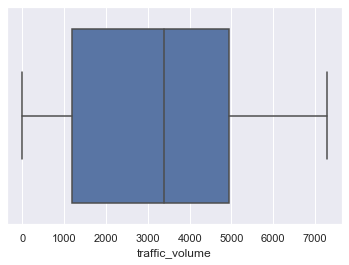

In [8]:
sns.boxplot(x=df['traffic_volume'])

There seem to be outliers at 0 and >> 7000 when the bulk of the data lies between ~1000 to ~5000.

0.00021908204622631176
0.0


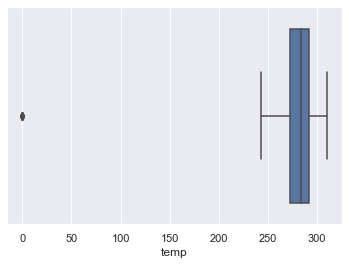

In [9]:
sns.boxplot(x=df['temp'])
print(len(df.loc[df['temp'] == 0])/len(df))
df = df.drop(df[df['temp'] == 0].index)
print(len(df.loc[df['temp'] == 0])/len(df))

Here we notice that there is a handful of outlier data with value of temp = 0. This could be due to missing data since it is impossible that the temperature on that day is 0 Kelvin. 

Hence, we drop these rows, given that the proportion of such rows is extremely low (0.0002190).

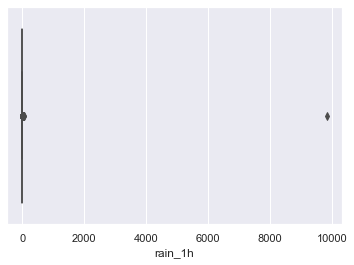

In [10]:
sns.boxplot(x=df['rain_1h'])
df.loc[df['rain_1h'] ==max(df['rain_1h'])]
df = df.drop(df[df['rain_1h'] == max(df['rain_1h'])].index)

An outlier near the value of 10000 exists, as the y variable of interest (traffic_volume) = 5535, which does not fall in the outlier region of traffic_volume, such an extreme value of rain_1h could result in a loss of accuracy in our models later.

Thus, we drop this particular row as well.

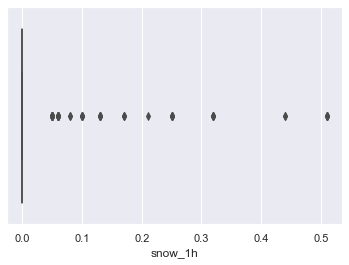

In [11]:
sns.boxplot(x=df['snow_1h'])

Here we do not drop any rows as not only is the range of snow_1h data is acceptable (0.0 to ~0.5), there does not seem to be any outlier as the high frequency of snow_1h = 0.0 does make sense as they simply represent days without snow.

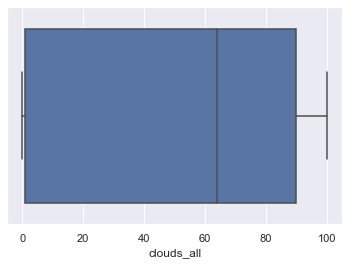

In [12]:
sns.boxplot(x=df['clouds_all'])

Similar to snow_1h, we do not drop any rows as such a distribution does not raise any suspicions. The distribution simply shows the % of cloud cover at every hour in the city.

In [13]:
df['hour'] = pd.to_datetime(df['date_time'], infer_datetime_format=True).apply(lambda x: x.hour)
df['month'] = pd.to_datetime(df['date_time'], infer_datetime_format=True).apply(lambda x: x.month)
df['year'] = pd.to_datetime(df['date_time'], infer_datetime_format=True).apply(lambda x: x.year)
df = df.drop('date_time', axis=1)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,month,year
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,1439,0,1,2013
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,1502,1,1,2013
2,None,264.16,0.0,0.0,75,Snow,heavy snow,933,2,1,2013
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,576,3,1,2013
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,372,4,1,2013
...,...,...,...,...,...,...,...,...,...,...,...
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,19,9,2018
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,20,9,2018
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,21,9,2018
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,22,9,2018


I decided to split date_time into 3 columns -- Year, Month, Time as traffic volume could possibly depend on the respective values due to effects arising from Y/M/T.

In [14]:
df['weather_description'].unique()

array(['broken clouds', 'scattered clouds', 'heavy snow',
       'overcast clouds', 'few clouds', 'sky is clear', 'mist', 'haze',
       'fog', 'light rain', 'moderate rain', 'drizzle',
       'light intensity drizzle', 'snow', 'freezing rain', 'shower snow',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'heavy intensity drizzle', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'proximity shower rain', 'smoke',
       'shower drizzle', 'light shower snow', 'sleet'], dtype=object)

In [15]:
dummies_weather = pd.get_dummies(df['weather_main'])
dummies_weather
df = df.drop('weather_main', axis = 1)
df = pd.concat([df, dummies_weather], axis='columns')

In [16]:
dummies_weather2 = pd.get_dummies(df['weather_description'])
dummies_weather2
df = df.drop('weather_description', axis = 1)
df = pd.concat([df, dummies_weather2], axis='columns')

I decided to use one hot encoding to convert weather_main & weather_description into a set of dummy variables as we do not want the machine to establish any relations such as drizzle > sky is clear for e.g.

In [17]:
dummies_holiday = pd.get_dummies(df['holiday'])
df = df.drop('holiday', axis = 1)
df = pd.concat([df, dummies_holiday], axis = 'columns')

I decided to adopt a mapping approach of converting holiday into an ordinal set of 2 categories -- 0 and 1 where 0 represents "None" and 1 represents a holiday. In this case, I assumed that the types of holidays do not have a significant effect on traffic_volume, just the fact that it is a holiday does.

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Here we produce a correlation matrix again to observe any significant correlations of > 0.5 after preprocessing the predictor variables.

In [19]:
df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,Clear,Clouds,...,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
0,263.49,0.0,0.0,58,1439,0,1,2013,0,1,...,0,0,0,0,1,0,0,0,0,0
1,263.78,0.0,0.0,40,1502,1,1,2013,0,1,...,0,0,0,0,0,1,0,0,0,0
2,264.16,0.0,0.0,75,933,2,1,2013,0,0,...,0,0,0,0,0,1,0,0,0,0
3,263.95,0.0,0.0,90,576,3,1,2013,0,1,...,0,0,0,0,0,1,0,0,0,0
4,263.65,0.0,0.0,90,372,4,1,2013,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,283.45,0.0,0.0,75,3543,19,9,2018,0,1,...,0,0,0,0,0,1,0,0,0,0
45641,282.76,0.0,0.0,90,2781,20,9,2018,0,1,...,0,0,0,0,0,1,0,0,0,0
45642,282.73,0.0,0.0,90,2159,21,9,2018,0,0,...,0,0,0,0,0,1,0,0,0,0
45643,282.09,0.0,0.0,90,1450,22,9,2018,0,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df.to_csv("data/prepared_df.csv", index=False)